# 국제 뉴스 api 가져오기
- https://newsapi.org/docs/endpoints/top-headlines

In [22]:
import datetime
import requests 
import pandas as pd

# 현재날짜
current_time = datetime.datetime.now()
one_day_ago = current_time - datetime.timedelta(days=1)
formatted_current_time = current_time.strftime('%Y-%m-%d-')
formatted_one_day_ago = one_day_ago.strftime('%Y-%m-%d')

key = "d9a0c8b871994b6b95e507879e9f9ef6"
# search = 'economics'
# headlines_url = f'https://newsapi.org/v2/everything?q={search}&apiKey={key}&searchIn=title&from={formatted_one_day_ago}&to={formatted_current_time}&language=en&sortBy=relevancy&page=1'
category = 'technology'
headlines_url = f'https://newsapi.org/v2/top-headlines?country=us&category={category}&apiKey={key}&pageSize=100'
result = requests.get(headlines_url)
print(result.status_code)

articles = result.json()['articles']
filtered_data = [{key:value for key, value in art.items() if key!='source'} for art in articles]
source_name = [a['source']['name'] for a in articles]
df_news = pd.DataFrame(filtered_data)
df_news['source_name'] = source_name
df_news.dropna(inplace=True)

df_news.shape


200


(59, 8)

In [23]:
import datetime
import requests 
import pandas as pd

# 현재날짜
current_time = datetime.datetime.now()
one_day_ago = current_time - datetime.timedelta(days=1)
formatted_current_time = current_time.strftime('%Y-%m-%d-')
formatted_one_day_ago = one_day_ago.strftime('%Y-%m-%d')

key = "d9a0c8b871994b6b95e507879e9f9ef6"
search = 'bitcoin'
# headlines_url = f'https://newsapi.org/v2/everything?q={search}&apiKey={key}&searchIn=title&from={formatted_one_day_ago}&to={formatted_current_time}&language=en&sortBy=relevancy&page=1'
category = 'technology'
headlines_url = f'https://newsapi.org/v2/top-headlines?country=us&category={category}&apiKey={key}&pageSize=100'
result = requests.get(headlines_url)
print(result.status_code)

articles = result.json()['articles']
filtered_data = [{key:value for key, value in art.items() if key!='source'} for art in articles]
source_name = [a['source']['name'] for a in articles]
df_news = pd.DataFrame(filtered_data)
df_news['source_name'] = source_name
df_news.dropna(inplace=True)

df_news.shape


200


(59, 8)

# 🌟🌟🌟🌟🌟df_news -> mysql에 바로 넣기
mysql에서 rawdata 불러와서 텍스트 분석 후 또 mysql에 넣기

## 텍스트 분석

### 형태소 분석

In [24]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import konlpy
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')


df_news['replace'] = df_news['title'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

# spaCy 모델 로드
nlp = spacy.load('en_core_web_sm')

# 'replace' 열의 각 문장에서 원형 추출
def extract_lemmas(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

df_news['lemmas'] = df_news['replace'].apply(extract_lemmas)
df_news['lemmas'] = df_news['lemmas'].str.lower()



def extract_nouns(text):
    tokens = word_tokenize(text)  # 문장을 단어로 토큰화
    tagged = pos_tag(tokens)  # 품사 태깅
    nouns = [word for word, tag in tagged if tag.startswith('N')]  # 명사(NN*)만 추출
    return ' '.join(nouns)

df_news['nouns'] = df_news['lemmas'].apply(extract_nouns)





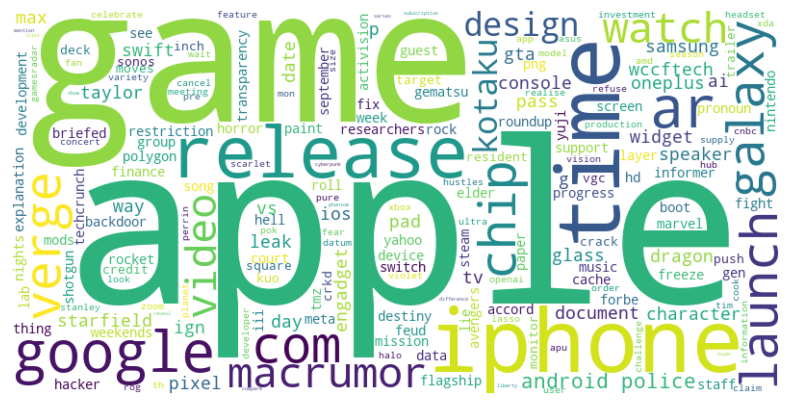

In [25]:
stop_words = ['s','net','review','life','news','age','trends','gate','nothing','ss','tech','i','home','man','z',
              'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
              'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
              'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
              'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
                'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
                'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
                'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
                'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
                  'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 
                  "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
                  'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
                  "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
all_text  = ' '.join(df_news['nouns'])


# Word Cloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(all_text)

# Word Cloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
from collections import Counter
word_freq = Counter(all_text.split()).most_common()
lst = [i for i in word_freq if i[0] not in stop_words]
keyword_lst = [keyword[0] for keyword in lst[:10]]
keyword_lst

['apple',
 'game',
 'iphone',
 'google',
 'release',
 'ars',
 'android',
 'police',
 'galaxy',
 'verge']

In [27]:
# 어떤 키워드가 'df_news['nouns']' 열에 있는지 확인하고 해당 행의 'title'을 출력
for keyword in keyword_lst:
    filtered_df = df_news[df_news['nouns'].apply(lambda x: any(k in x for k in keyword_lst))]

filtered_df

,author,title,description,url,urlToImage,publishedAt,content,source_name,replace,lemmas,nouns
1,Dan Goodin,Chinese hackers have unleashed a never-before-...,SprySOCKS borrows from open source Windows mal...,https://arstechnica.com/security/2023/09/never...,https://cdn.arstechnica.net/wp-content/uploads...,2023-09-18T23:25:04Z,7 with \r\nResearchers have discovered a never...,Ars Technica,Chinese hackers have unleashed a never before ...,chinese hacker have unleash a never before see...,hacker see backdoor ars
2,Alex Stedman,Lies of P Is Now Available on Game Pass a Day ...,"Lies of P is now available on Game Pass, with ...",https://www.ign.com/articles/lies-of-p-is-now-...,https://assets-prd.ignimgs.com/2023/09/12/lie-...,2023-09-18T22:20:15Z,Lies of P is now available on Game Pass just a...,IGN,Lies of P Is Now Available on Game Pass a Day ...,lie of p be now available on game pass a day e...,lie p game pass day ign
7,Marcus Stewart,The Elder Scrolls 6 Launching No Earlier Than ...,The document also confirmed it's not coming to...,https://www.gameinformer.com/2023/09/18/the-el...,https://www.gameinformer.com/sites/default/fil...,2023-09-18T20:41:00Z,"Starfield is Bethesda's big new release, but n...",Gameinformer.com,The Elder Scrolls Launching No Earlier Than ...,the elder scrolls launch no early than ...,elder accord court document game informer
9,Taylor Kerns,Google devices face new speaker group restrict...,"Citing 'a recent legal decision,' Google has r...",https://www.androidpolice.com/new-google-home-...,https://static1.anpoimages.com/wordpress/wp-co...,2023-09-18T20:38:00Z,Summary\r\n<ul><li> Google has implemented lim...,Android Police,Google devices face new speaker group restrict...,google device face new speaker group restricti...,google device speaker group restriction feud a...
10,Dan O'Curry,Apple iPhone 15 vs. Samsung Galaxy S23: Flagsh...,The new iPhone 15 looks to be a powerful phone...,https://www.androidpolice.com/apple-iphone-15-...,https://static1.anpoimages.com/wordpress/wp-co...,2023-09-18T20:00:00Z,<ul><li> iPhone 15 \r\nThe Apple iPhone 15 pac...,Android Police,Apple iPhone vs Samsung Galaxy S Flagsh...,apple iphone vs samsung galaxy s fla...,apple iphone vs samsung galaxy flagship fight ...
13,Andrew Cunningham,"Hell freezes over, MS Paint adds support for l...",Automated background removal was also added re...,https://arstechnica.com/gadgets/2023/09/hell-f...,https://cdn.arstechnica.net/wp-content/uploads...,2023-09-18T19:26:07Z,Enlarge/ Layers in MS Paint! Cats and dogs liv...,Ars Technica,Hell freezes over MS Paint adds support for l...,hell freeze over ms paint add support for la...,hell freeze paint support layer png transparen...
14,Sean Hollister,Meta is shutting down three Oculus games witho...,Meta’s shutting down Oculus Quest and / or Rif...,https://www.theverge.com/2023/9/18/23879252/me...,https://cdn.vox-cdn.com/thumbor/wJKSBc5BZM0X4H...,2023-09-18T19:19:56Z,Meta is shutting down three Oculus games witho...,The Verge,Meta is shutting down three Oculus games witho...,meta be shut down three oculus game without ex...,meta game explanation verge
23,"Ivan Mehta, Lauren Forristal and Sarah Perez",These iOS 17 apps bring interactive widgets to...,Apple announced iOS 17 back in June at the Wor...,https://techcrunch.com/2023/09/18/these-ios-17...,https://techcrunch.com/wp-content/uploads/2023...,2023-09-18T17:27:40Z,Apple announced iOS 17 back in June at the Wor...,TechCrunch,These iOS apps bring interactive widgets to...,these ios app bring interactive widget to ...,ios widget iphone home screen techcrunch
26,Juli Clover,Apple Releases watchOS 10 With Widget-Focused ...,"Apple today released watchOS 10, the newest ve...",https://www.macrumors.com/2023/09/18/apple-rel...,https://images.macrumors.com/t/2qQQJJFec83ZaYS...,2023-09-18T17:03:13Z,"Apple today released watchOS 10, the newest ve...",MacRumors,Apple Releases watchOS With Widget Focused ...,apple releases watchos with widget focused...,ap

In [28]:
for i in filtered_df['url']:
    print(i)

https://arstechnica.com/security/2023/09/never-before-seen-linux-backdoor-is-a-windows-malware-knockoff/
https://www.ign.com/articles/lies-of-p-is-now-available-on-game-pass-a-day-early
https://www.gameinformer.com/2023/09/18/the-elder-scrolls-6-launching-no-earlier-than-2026-according-to-microsoft-court-document
https://www.androidpolice.com/new-google-home-speaker-group-limitations/
https://www.androidpolice.com/apple-iphone-15-vs-samsung-galaxy-s23/
https://arstechnica.com/gadgets/2023/09/hell-freezes-over-ms-paint-adds-support-for-layers-and-png-transparency/
https://www.theverge.com/2023/9/18/23879252/meta-shut-down-dead-buried-bogo-oculus-games
https://techcrunch.com/2023/09/18/these-ios-17-apps-bring-interactive-widgets-to-your-iphone-home-screen/
https://www.macrumors.com/2023/09/18/apple-releases-watchos-10/
https://www.videogameschronicle.com/news/microsoft-targeted-a-2028-launch-for-its-next-xbox-console/
https://arstechnica.com/gadgets/2023/09/apple-will-charge-you-way-less

In [29]:
content = filtered_df.to_html(escape=False)
content = content.replace('<table border="1" class="dataframe">', '<table border="0" class="dataframe" bgcolor=black cellpadding=1 cellspacing=1><tr><td><table border="0" class="dataframe" bgcolor=black>')
content = content.replace('</table>', '</table> </td></tr></table>')
content = content.replace('<td>','<td bgcolor=white>')
content = content.replace('<th>','<th bgcolor=#e5e5e5>')

In [30]:
#-*- coding: utf-8 -*-
def send_mail():
    import smtplib
    from email.mime.text import MIMEText
    from email.header import Header

    html_content = rf"""
    <html>
    <head></head>
    <body>
    <h1>Hello하하하하, this is an HTML email</h1>
    <p>This email contains HTML content.</p>
    </body>
    </html>

    {content}
    """


    msg = MIMEText(f'{html_content}','html','utf-8')                   # 메일 본문 첨부
    msg['Subject'] = Header('메일 제목','utf-8') # 메일 제목 첨부
    msg['From'] = 'brownpuka94@gmail.com'       # 송신 메일
    msg['To'] = 'brownpuka94@naver.com'        # 수신 메일
    with smtplib.SMTP_SSL('smtp.gmail.com') as smtp: # (*)
        smtp.login('brownpuka94@gmail.com','zzjx dlve yqrb vehx')           # (**)
        smtp.send_message(msg)

    print('메일 전송 중')

https://meir.tistory.com/113

In [31]:
import schedule
import time

# schedule.every().day.at('19:13').do('함수')
schedule.every(11).seconds.do(send_mail)

while True:
    schedule.run_pending()
    time.sleep(1)

KeyboardInterrupt: 

In [ ]:
# import smtplib
# from email.mime.text import MIMEText
# from email.header import Header

# # HTML table with inline CSS for styling
# html_table = """
# <table style="border-collapse: collapse; width: 50%;">
#   <tr>
#     <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Name</th>
#     <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Age</th>
#   </tr>
#   <tr>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Alice</td>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">25</td>
#   </tr>
#   <tr>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Bob</td>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">30</td>
#   </tr>
#   <tr>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Charlie</td>
#     <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">35</td>
#   </tr>
# </table>
# """

# msg = MIMEText(f'{html_table}', 'html', 'utf-8')  # Email body contains the styled HTML table
# msg['Subject'] = Header('메일 제목', 'utf-8')
# msg['From'] = 'brownpuka94@gmail.com'
# msg['To'] = 'brownpuka94@naver.com'

# with smtplib.SMTP_SSL('smtp.gmail.com') as smtp:
#     smtp.login('brownpuka94@gmail.com', 'zzjx dlve yqrb vehx')
#     smtp.send_message(msg)
